In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 少数第3位まで表示
%precision 3

'%.3f'

カレントディレクトリの確認

In [2]:
pwd

'/Users/kuramotoyuuta/Documents/DataScience/Tokyo.unv/chapter_03'

ディレクトリの作成と移動

In [3]:
mkdir chap03

mkdir: chap03: File exists


In [4]:
cd ./chap03

/Users/kuramotoyuuta/Documents/DataScience/Tokyo.unv/chapter_03/chap03


ZIPファイルとファイルをダウンロードするためのライブラリ

requests : Webデータの送受信をする<br>
zipfile : ZIP形式ファイルを読み書きする<br>
io : ファイルを読み書きする

In [5]:
# webからデータを習得したり、zipファイルを扱うためのライブラリ
import requests, zipfile
from io import StringIO
import io

ZIPファイルをダウンロードして展開する

In [6]:
# データがあるurlの指定
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをurlから取得する
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [7]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


データの読み込みと確認

データをDataFrameとして読み込む

In [8]:
student_data_math = pd.read_csv('student-mat.csv')

データを確認する

In [9]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


カンマで区切ってデータを読み込む

In [10]:
# データの読み込み
# 区切りに；がついているので注意
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [11]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

データの性質を確認する

データの個数や型を確認する

In [13]:
# 全てのカラムの情報等チェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

量的データと質的データ

量的データ : 四則演算を適用可能な連続値で表現されるデータであり、比率に意味がある。例）人数や金額などのデータ<br>
質的データ : 四則演算を適用不可能な不連続なデータであり、状態を表現するために利用される。例）順位やカテゴリーなどのデータ

In [14]:
# 量的データ
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [15]:
# 質的データ
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

軸別に平均値を求める

In [16]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

<h1>ヒストグラム</h1>

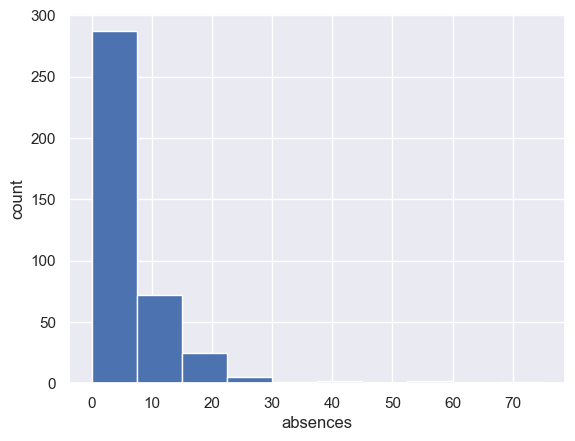

In [17]:
# histogram データの指定
plt.hist(student_data_math['absences'])

# x軸とy軸のそれぞれのラベル
plt.xlabel('absences')
plt.ylabel('count')

# グリッドをつける
plt.grid(True)

<h1>平均、中央値、最頻値</h1>

In [18]:
# 平均値
print('平均値：', student_data_math['absences'].mean())
# 中央値
print('中央値：', student_data_math['absences'].median())
# 最頻値
print('最頻値：', student_data_math['absences'].mode())

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
Name: absences, dtype: int64


<h1>分散と標準偏差</h1>

In [19]:
# 分散
student_data_math['absences'].var()

64.050

In [20]:
# 標準偏差
student_data_math['absences'].std()

8.003

In [21]:
np.sqrt(student_data_math['absences'].var())

8.003

<h1>要約統計量とパーセントスタイル</h1>

In [22]:
# 要約統計量
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

<h3>四方位範囲を求める</h3>

In [23]:
# 四分位範囲（　75% タイル - 25%タイル）
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.000

<h3>全列を対象とした結果を求める</h3>

In [24]:
# 要約統計量をまとめて計算
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<h1>箱ひげ図</h1>

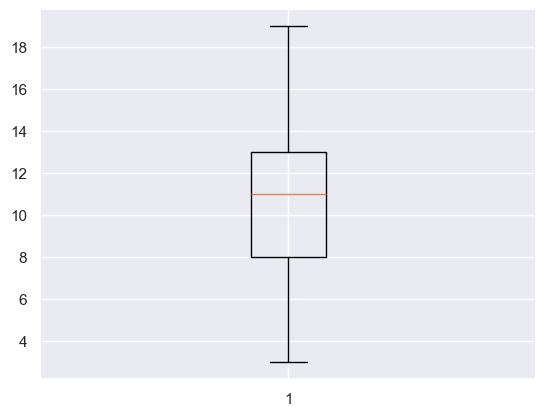

In [25]:
# 箱ひげ図　 : G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

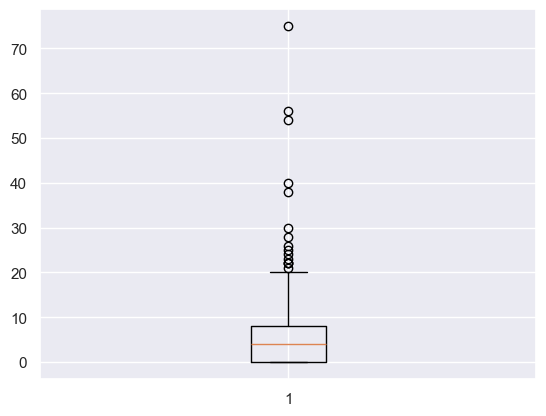

In [26]:
# 箱ひげ図 : 欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

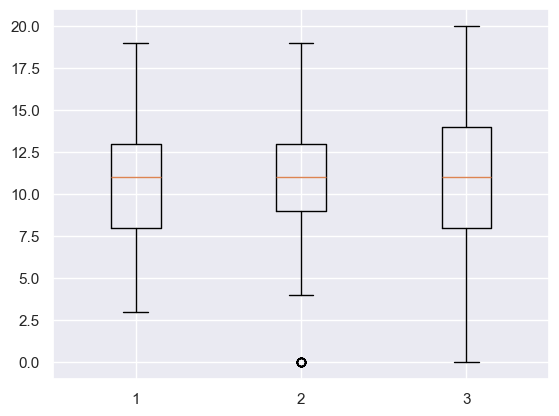

In [27]:
# 箱ひげ図 : G1, G2, G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

<h1>変動係数</h1>

In [28]:
# 変動係数 : 欠席数
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

In [29]:
student_data_math.std() / student_data_math.mean()

TypeError: could not convert string to float: 'GP'

In [ ]:
# 変動係数を一気に算出
student_data_math.select_dtypes(include=[np.number]).apply(lambda x: x.std() / x.mean())

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

<h1>散布図と相関係数</h1>

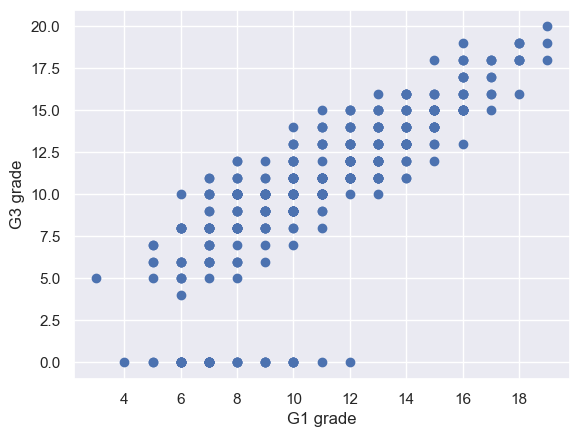

In [ ]:
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

# ラベル
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

<h3>共分散</h3>

In [ ]:
# 共分散行列
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [ ]:
# 分散
print('G1の分散:', student_data_math['G1'].var())
print('G3の分散:', student_data_math['G3'].var())


G1の分散: 11.017053267364904
G3の分散: 20.989616397866733


<h3>相関係数</h3>

In [ ]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

PearsonRResult(statistic=0.8014679320174132, pvalue=9.001430312283913e-90)

In [ ]:
# 相関行列
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

<h1>すべての変数のヒストグラムや散布図を描く</h1>

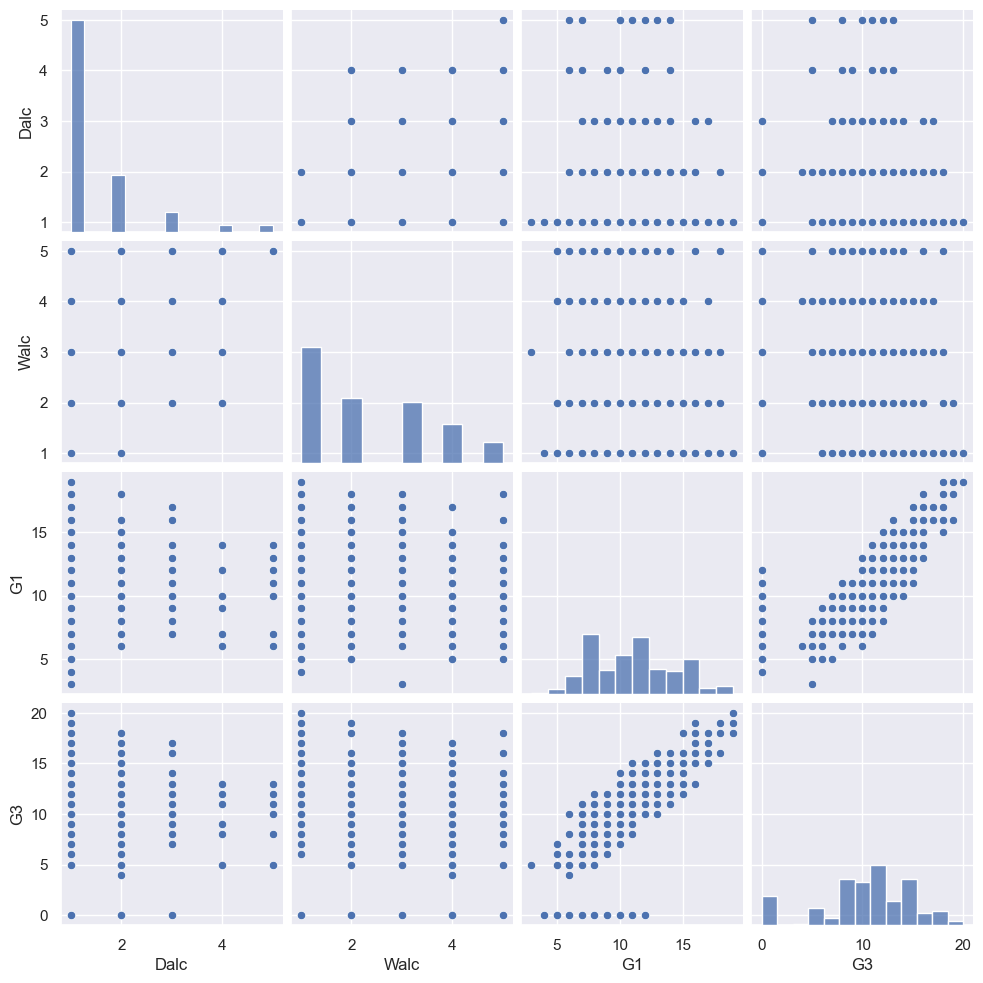

In [31]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [32]:
# 例：週末にアルコールを飲む人の1期目の成績の平均値
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64